In [1]:
libraries<-c("DESeq2","ggplot2","viridis","RColorBrewer","pheatmap","edgeR","ggfortify","factoextra")
suppressPackageStartupMessages(lapply(libraries, require, character.only = TRUE))

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

In [2]:
countData <- read.csv("/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani/analysis/04_featureCounts/Ldonovani_counts_cleaned.txt",
                      sep = '\t',row.names=1)

In [3]:
countData

,Chr,Start,End,Strand,Length,ERR1852713,ERR1852714,ERR1852715,ERR1852716,ERR1852717,ERR1852718,ERR1852719,ERR1852720,ERR1852721,ERR1852722,ERR1852723
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ncRNA00001,Ld01_v01s1,2046,2084,-,39,621,146,66,163,195,258,164,147,367,257,61
ncRNA00002,Ld01_v01s1,2048,2080,+,33,10,2,2,3,3,10,0,3,3,6,1
ncRNA00003,Ld01_v01s1,2136,2163,+,28,6,1,0,3,0,7,0,0,3,3,2
ncRNA00004,Ld01_v01s1,2136,2165,-,30,529,123,34,147,180,215,121,97,343,230,63
ncRNA00005,Ld01_v01s1,3243,3263,-,21,346,80,25,98,117,131,99,56,237,157,52
ncRNA00006,Ld01_v01s1,3243,3265,+,23,0,1,0,0,0,1,0,0,1,0,0
LdBPK_010010.1.1,Ld01_v01s1,3662,4663,-,1002,4871,1172,416,1515,1611,1777,1261,850,2975,2006,585
LdBPK_010020.1.1,Ld01_v01s1,5750,7411,-,1662,644,909,338,656,585,948,768,282,719,1008,325
LdBPK_010030.1.1,Ld01_v01s1,9003,11024,-,2022,1063,1494,490,1284,914,1744,1063,838,1370,1819,438


In [4]:
samples <- read.delim("/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani/analysis/05_DEG/metadata.txt",
                      header=T)

In [5]:
countData[,1:5] <- NULL

In [6]:
groups<-samples$class

In [7]:
as.factor(samples$class)

[1] promastigote amastigote   amastigote   promastigote promastigote
 [6] promastigote amastigote   promastigote promastigote promastigote
[11] amastigote  
Levels: amastigote promastigote

In [8]:
d <- DGEList(counts=countData,group=factor(groups))

In [9]:
# Filter lowly expressed genes
keep <- filterByExpr(d,group = groups,min.prop = 0.5, min.count = 10, min.total.count = 15, large.n = 5)
d <- d[keep, , keep.lib.sizes=FALSE]

In [10]:
d$counts

,ERR1852713,ERR1852714,ERR1852715,ERR1852716,ERR1852717,ERR1852718,ERR1852719,ERR1852720,ERR1852721,ERR1852722,ERR1852723
ncRNA00001,621,146,66,163,195,258,164,147,367,257,61
ncRNA00004,529,123,34,147,180,215,121,97,343,230,63
ncRNA00005,346,80,25,98,117,131,99,56,237,157,52
LdBPK_010010.1.1,4871,1172,416,1515,1611,1777,1261,850,2975,2006,585
LdBPK_010020.1.1,644,909,338,656,585,948,768,282,719,1008,325
LdBPK_010030.1.1,1063,1494,490,1284,914,1744,1063,838,1370,1819,438
LdBPK_010040.1.1,640,977,461,504,586,410,950,112,444,534,417
ncRNA00007,11,11,3,4,4,13,5,1,12,16,6
ncRNA00009,109,177,52,108,170,120,126,85,99,120,50
LdBPK_010050.1.1,1614,2704,848,1887,2062,1379,1861,990,1213,1577,759


In [11]:
dim(d)
#head(d$counts)
d.full <- d # keep the old one in case we mess up
#head(d$counts)
dim(d)
d$samples$lib.size <- colSums(d$counts)
d_cpm <- calcNormFactors(d,method = "none")
cpms<-cpm(d_cpm, log=FALSE,normalized.lib.sizes = T)
cmpl<-cpm(d_cpm,log = T,normalized.lib.sizes = T)


d_TMM <- calcNormFactors(d, method="TMM")

# Calculate the cpm with the TMM normalized library
TMM <- cpm(d_TMM, log = FALSE, normalized.lib.sizes=TRUE)
tmm_log<-log(1+TMM)

[1] 15442    11

[1] 15442    11

In [12]:
write.table(cpms,file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani/analysis/05_DEG/normCounts_cpm.tsv",sep = '\t',quote = F)
write.table(cmpl,file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani/analysis/05_DEG/normCounts_cpm_log.tsv",sep = '\t',quote = F)
write.table(TMM,file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani/analysis/05_DEG/normCounts_tmm.tsv",sep = '\t',quote = F)
write.table(tmm_log,file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani/analysis/05_DEG/normCounts_tmm_log.tsv",sep = '\t',quote = F)

In [13]:
# Normalize the data
d <- calcNormFactors(d)

In [14]:
#Create a design matrix to specify the model.
design <- model.matrix(~ 0 + groups)  # No intercept, group levels as factorscolnames(design) <- levels(groups)
colnames(design) <- levels(as.factor(groups))

In [15]:
# Estimate dispertion
y <- estimateDisp(d, design)

In [16]:
y

,ERR1852713,ERR1852714,ERR1852715,ERR1852716,ERR1852717,ERR1852718,ERR1852719,ERR1852720,ERR1852721,ERR1852722,ERR1852723
ncRNA00001,621,146,66,163,195,258,164,147,367,257,61
ncRNA00004,529,123,34,147,180,215,121,97,343,230,63
ncRNA00005,346,80,25,98,117,131,99,56,237,157,52
LdBPK_010010.1.1,4871,1172,416,1515,1611,1777,1261,850,2975,2006,585
LdBPK_010020.1.1,644,909,338,656,585,948,768,282,719,1008,325
LdBPK_010030.1.1,1063,1494,490,1284,914,1744,1063,838,1370,1819,438
LdBPK_010040.1.1,640,977,461,504,586,410,950,112,444,534,417
ncRNA00007,11,11,3,4,4,13,5,1,12,16,6
ncRNA00009,109,177,52,108,170,120,126,85,99,120,50
LdBPK_010050.1.1,1614,2704,848,1887,2062,1379,1861,990,1213,1577,759


In [17]:
# Fit the model
fit <- glmQLFit(y, design)

In [18]:
contrast2 <- makeContrasts(amastigote_vs_promastigote  = amastigote - promastigote, levels = design)
qlf2 <- glmQLFTest(fit, contrast = contrast2)
top2 <- topTags(qlf2, n = Inf)


In [19]:
# Save the results to a TSV file
write.table(as.data.frame(top2), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani/analysis/05_DEG/AMAvsPRO_EdgeR.tsv", sep = "\t", quote = FALSE, row.names = TRUE)

In [20]:
DE_list_AMAvsPRO <- subset(top2$table, FDR < 0.05 & logFC>= 1 | FDR < 0.05 & logFC <= -1)

In [21]:
# Save the results to a TSV file
write.table(as.data.frame(DE_list_AMAvsPRO), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani//analysis/05_DEG/AMAvsPRO_filtered_EdgeR.tsv", sep = "\t", quote = FALSE, row.names = TRUE)


In [22]:
dds <- DESeqDataSetFromMatrix(countData = d$counts, colData = samples, design = ~ class)
dds

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 15442 11 
metadata(1): version
assays(1): counts
rownames(15442): ncRNA00001 ncRNA00004 ... LdBPK_367350.1.1
  LdBPK_367360.1.1
rowData names(0):
colnames(11): ERR1852713 ERR1852714 ... ERR1852722 ERR1852723
colData names(2): sample class

In [23]:
dds <- dds[rowSums(counts(dds)) > 1, ]

In [24]:
dds <- DESeq(dds,parallel = TRUE)

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 30 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 30 workers

-- replacing outliers and refitting for 27 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [25]:
#make contrast
res2 <- results(dds, contrast = c("class", "amastigote", "promastigote"))

In [26]:
# Save the results to a TSV file
write.table(as.data.frame(res2), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani/analysis/05_DEG/AMAvsPRO_DESeq.tsv", sep = "\t", quote = FALSE, row.names = TRUE)

In [27]:
DEseq_list_AMAvsPRO <- subset(res2, padj < 0.05 & log2FoldChange>= 1 | padj < 0.05 & log2FoldChange <= -1)

In [28]:
# Save the results to a TSV file

write.table(as.data.frame(DEseq_list_AMAvsPRO), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani/analysis/05_DEG/AMAvsPRO_filtered_DESeq.tsv", sep = "\t", quote = FALSE, row.names = TRUE)

In [29]:
normcounts<-as.data.frame(counts(dds,normalized =TRUE))

In [30]:
write.table(normcounts,file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani/analysis/05_DEG/normCounts_DESeq2.tsv",sep = '\t',quote = F)

In [31]:
vsd <- vst(dds, blind = TRUE)

using ntop=500 top features by variance



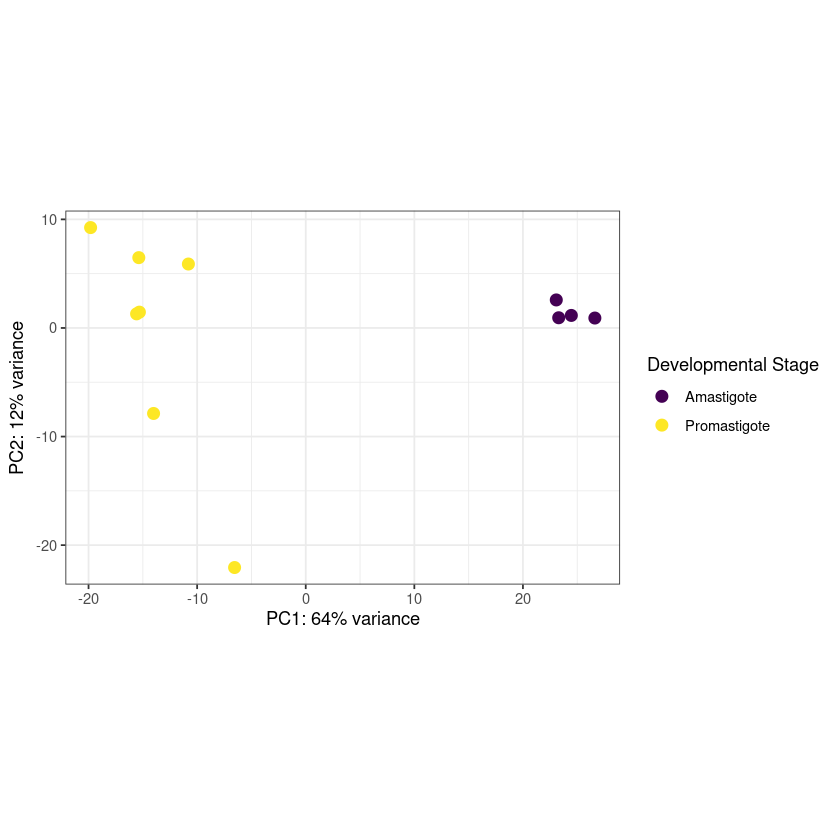

In [32]:
pcaData<-plotPCA(vsd, intgroup=c( "class"), returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
pcaD<-ggplot(pcaData, aes(PC1, PC2, color=class,linetype=class)) +
  geom_point(size=3)  +
  guides(col=guide_legend("Developmental Stage"))+
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  scale_colour_viridis_d(option = "D",labels=c("amastigote" = "Amastigote",
                                              "promastigote" = "Promastigote" 
                                              ))+
  coord_fixed()+
  theme_bw()
pcaD

In [33]:
ggsave("/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani/analysis/05_DEG/plots/PCAdeseq.pdf",
       pcaD, device="pdf",dpi = 300,
       width = 14.85,
       height = 18,
       units = "cm")

ggsave("/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani/analysis/05_DEG/plots/PCAdeseq.png",
       pcaD, device="png",dpi = 300,
       width = 14.85,
       height = 18,
       units = "cm")

ggsave("/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani/analysis/05_DEG/plots/PCAdeseq.tiff",
       pcaD, device="tiff",dpi = 300,
       width = 14.85,
       height = 18,
       units = "cm")

In [34]:
normalized_counts <- assay(vsd)

In [35]:
ann<-samples
rownames(ann)<-ann$sample
ann$sample<-NULL


In [36]:
ann_colors = list(
  class = c(amastigote="#440154",promastigote="#fde725"))

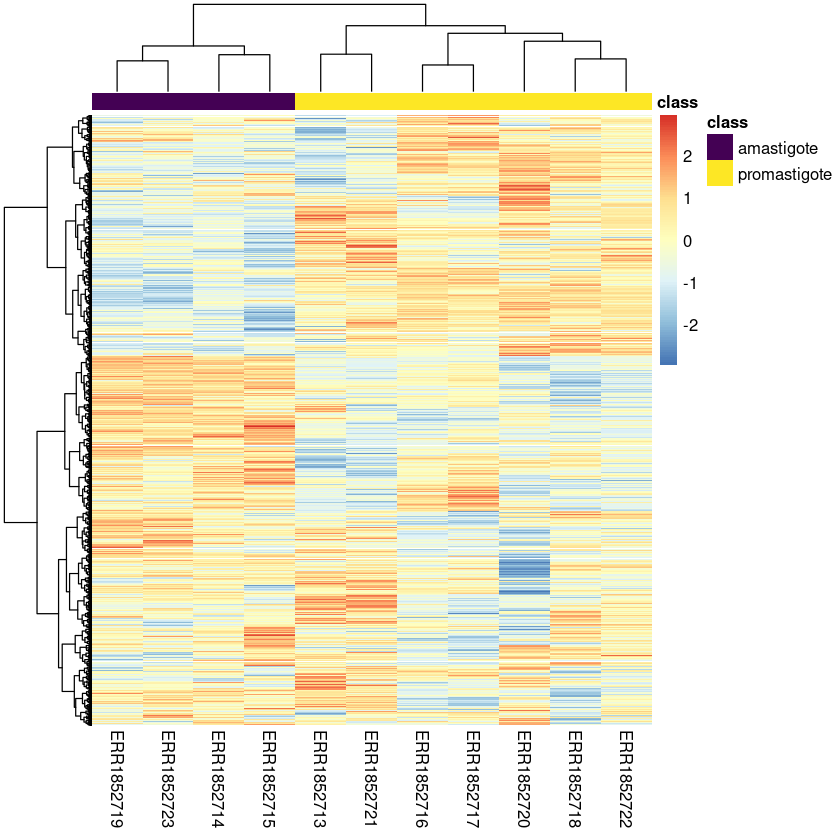

In [37]:
# Define a color palette
colors <- colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(100)

# Generate the heatmap with clustering
distSamples<-pheatmap(normalized_counts, 
         scale = "row", 
         clustering_distance_rows = "euclidean", 
         clustering_distance_cols = "euclidean", 
         clustering_method = "ward.D2", 
         annotation_col = ann,
         annotation_colors=ann_colors,
         color = colors, 
         show_rownames = FALSE, 
         show_colnames = TRUE)


In [38]:
save_pheatmap <- function(x, filename, width=10, height=10, res=300) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   png(filename,width = width, height=height,res = res,units = "in")
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

save_pheatmap_pdf <- function(x, filename, width=10, height=10) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename,width = width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

save_pheatmap_tiff <- function(x, filename, width=10, height=10) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   tiff(filename,width = width, height=height,res = 300,units = "in")
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

In [39]:
save_pheatmap(distSamples, 
              filename="/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani/analysis/05_DEG/plots/clustering_heatmap.png")
save_pheatmap_pdf(distSamples, 
                  filename="//media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani/analysis/05_DEG/plots/clustering_heatmap.pdf")
save_pheatmap_tiff(distSamples, 
                   filename="/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Ldonovani/analysis/05_DEG/plots/clustering_heatmap.tiff")

pdf 
  2

pdf 
  2

pdf 
  2